In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ioff()

In [3]:
data = np.random.randn(1000, 2)

In [4]:
M = .3
C = .1
labels = np.array(M*data[:,0] - data[:,1] + C > 0, dtype=np.int)

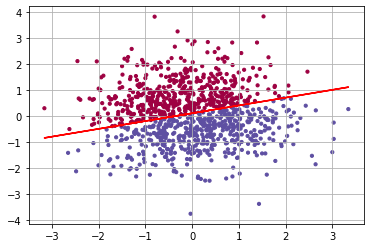

In [5]:
plt.scatter(data[:,0], data[:, 1], s=10, c=labels, cmap=plt.cm.Spectral)
plt.plot(data[:,0], M*data[:,0]+C, 'r')
plt.grid()

In [6]:
class SVMLinearClassifier:
    def __init__(self, X, Y, learning_rate, batch_size, num_epochs):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.X, self.Y = X, Y
        self.weights = {'M': np.random.randn(1,), 'C': np.random.randn(1,)}
    
    def forward_prop(self, x, y):
        y_hat = np.dot(self.weights['M'], x) + self.weights['C'] - y
        loss = np.power(y_hat-y, 2)
        return y_hat, loss
    
    def back_prop(self, x, y, y_hat, loss):
        dM = 2*np.dot(y_hat - y, x)
        dC = 2*np.sum(y_hat - y)
        return {'dM': dM, 'dC': dC}
    
    def fit(self):
        losses = []
        num_batches = int(self.X.shape[0]/self.batch_size)
        for epoch in range(self.num_epochs):
            for batch_num in range(num_batches):
                x_batch = self.X[batch_num:batch_num+self.batch_size]
                y_batch = self.Y[batch_num:batch_num+self.batch_size]
                y_hat, loss = self.forward_prop(x_batch, y_batch)
                grads = self.back_prop(x_batch, y_batch, y_hat, loss)
#                 print(x_batch, y_batch, y_hat, loss, grads)
                self.weights['M'] -= self.learning_rate*grads['dM']
                self.weights['C'] -= self.learning_rate*grads['dC']
                print("Epoch {} Batch {} Loss = {} Weights {}".format(epoch, batch_num, np.mean(loss), self.weights))
                losses.append(np.mean(loss))
        return losses

In [7]:
svm = SVMLinearClassifier(X=data, Y=labels, learning_rate = 1e-3, batch_size=5, num_epochs=1)

In [8]:
svm.fit()

ValueError: shapes (1,) and (5,2) not aligned: 1 (dim 0) != 5 (dim 0)